# Process manipulation

The objective here is to manipulate a multivariate stochastic process $X: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^d$, where $\mathcal{D} \in \mathbb{R}^n$ is discretized on the mesh $\mathcal{M}$ and exhibit some of the services exposed by the *Process* objects:

- ask for the dimension, with the method getOutputDimension
- ask for the mesh, with the method getMesh
- ask for the mesh as regular 1-d mesh, with the getTimeGrid method
- ask for a realization, with the method the getRealization method
- ask for a continuous realization, with the getContinuousRealization method
- ask for a sample of realizations, with the getSample method
- ask for the normality of the process with the isNormal method
- ask for the stationarity of the process with the isStationary method

In [20]:
from __future__ import print_function
import openturns as ot
import math as m

In [21]:
# Create a mesh which is a RegularGrid
tMin = 0.0
timeStep = 0.1
n = 100
time_grid = ot.RegularGrid(tMin, timeStep, n)
time_grid.setName('time')

In [22]:
# Create a process of dimension 3
# Normal process with an Exponential covariance model
# Amplitude and scale values of the Exponential model
scale = [4.0]
amplitude = [1.0, 2.0, 3.0]
# spatialCorrelation
spatialCorrelation = ot.CorrelationMatrix(3)
spatialCorrelation[0, 1] = 0.8
spatialCorrelation[0, 2] = 0.6
spatialCorrelation[1, 2] = 0.1
myCovarianceModel = ot.ExponentialModel(scale, amplitude, spatialCorrelation)
process = ot.GaussianProcess(myCovarianceModel, time_grid)

In [23]:
# Get the dimension d of the process
process.getOutputDimension()

3

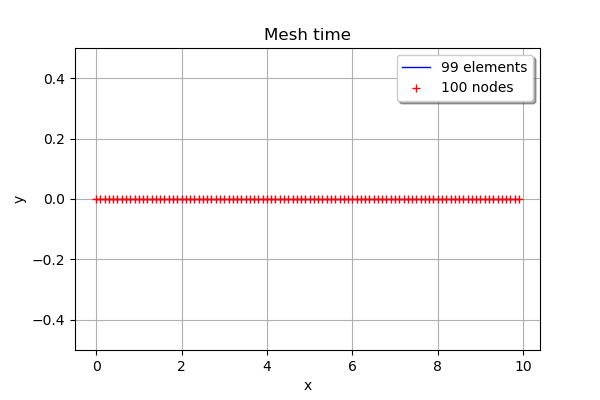

In [24]:
# Get the mesh of the process
mesh = process.getMesh()

# Get the corners of the mesh
minMesh = mesh.getVertices().getMin()[0]
maxMesh = mesh.getVertices().getMax()[0]
mesh.draw()

In [25]:
# Get the time grid of the process
# only when the mesh can be interpreted as a regular time grid
process.getTimeGrid()

class=RegularGrid name=time start=0 step=0.1 n=100

In [26]:
# Get a realisation of the process
realization = process.getRealization()
realization

class=Field name=Unnamed description=[t,y0,y1,y2] implementation=class=FieldImplementation name=Unnamed mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=3 description=[y0,y1,y2] data=[[0.321172,0.901953,1.36583],[0.644487,1.13162,2.19685],[0.366506,0.710677,1.85181],[0.212131,0.398751,1.87635],[0.0470363,0.203915,1.21118],[0.0735128,0.245439,0.957254],[0.711861,1.52612,1.12631],[0.519171,1.19732,0.335898],[0.0383284,0.31729,-0.33849],[0.131554,0.454321,-0.742833],[-0.115827,0.0974638,-1.81311],[0.00905869,0.197166,-1.23268],[-0.212443,-0.47999,-1.16949],[-0.45456,-0.558394,-2.56667],[-0.167604,-0.162202,-1.64035],[0.0674532,0.120115,-0.613936],[0.823676,1.38341,0.47087],[0.612037,1.40842,-0.16854],[0.315973,1.17428,-1.24376],[0.576631,1.58299,-0.425591],[0.653975,1.88289,-0.139787],[0.758858,1.65767,0.904814],[0.851872,1.77683,1.06865],[1.097,1.21811,2.66958],[0.768751,0.900069,1.82845],[0.853113,0.557316,2.4164],[0.933136,0.633463,2.24774],[0.995519,0.667939,2.22697],[0.881298,0.349396,2.12645],[1.04705,0.493833,2.62516],[0.88019,-0.00411686,2.24737],[0.65827,-0.45783,1.86182],[0.732562,-0.668304,2.60196],[0.453713,-0.728703,1.79844],[0.570487,-0.635136,1.80563],[0.339966,-1.2456,2.07831],[0.225432,-1.18863,1.95867],[0.187582,-1.65899,2.73976],[0.293848,-1.99209,3.44304],[-0.059642,-2.40737,2.59369],[-0.12481,-2.26264,2.30501],[-0.502601,-2.89857,1.57463],[-0.96593,-3.85697,1.51415],[-0.978289,-3.77247,1.02232],[-1.09849,-4.28025,1.43921],[-1.33605,-4.4206,0.831198],[-1.51295,-4.23446,0.0100381],[-1.53642,-4.3423,0.00552055],[-1.40637,-4.23182,-0.0770261],[-1.03682,-3.67553,0.999033],[-0.95751,-3.44172,1.62917],[-1.24693,-4.23748,1.63288],[-1.18369,-4.06061,0.698618],[-1.48327,-4.55737,-0.260882],[-1.61495,-5.19682,0.480573],[-1.64509,-4.87655,-0.0347058],[-1.84109,-5.18,-0.655681],[-1.38708,-5.02984,1.07214],[-1.18219,-4.14686,0.402446],[-0.982759,-4.31816,1.77313],[-1.00046,-4.33241,1.70416],[-0.927797,-4.24597,1.61596],[-0.929523,-4.78456,2.66272],[-0.754481,-4.56384,2.74523],[-0.778749,-4.68225,2.8833],[-0.871754,-4.21066,1.93105],[-0.836524,-4.13849,1.77071],[-0.653046,-3.46426,1.94387],[-0.926594,-3.65524,1.10613],[-1.27641,-4.22117,0.122116],[-1.00357,-4.02959,1.25385],[-1.30001,-4.04573,-0.439788],[-1.11446,-4.10069,-0.180145],[-1.06914,-4.08218,0.343505],[-1.13456,-4.1959,0.814027],[-0.991951,-3.707,0.58384],[-0.24156,-2.77695,2.07958],[-0.0627918,-1.99

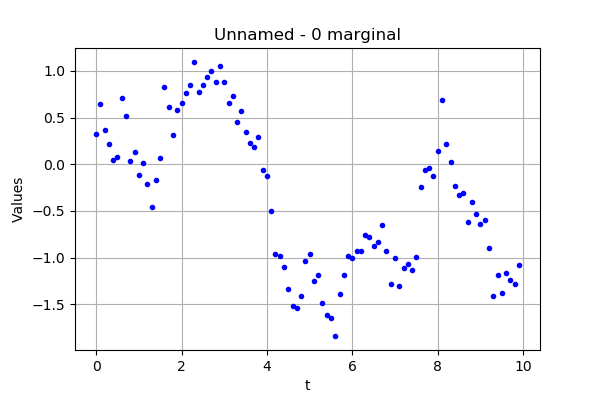

In [27]:
# Draw one realization
interpolate=False
realization.drawMarginal(0, interpolate)

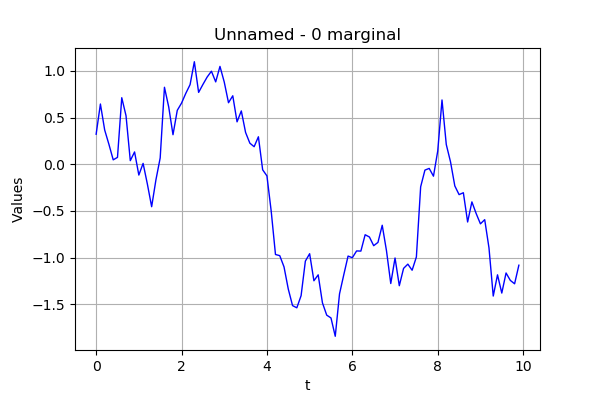

In [28]:
# Same graph, but draw interpolated values
realization.drawMarginal(0)

In [29]:
# Get a function representing the process using P1 Lagrange interpolation
# (when not defined from a functional model)
continuousRealization = process.getContinuousRealization()

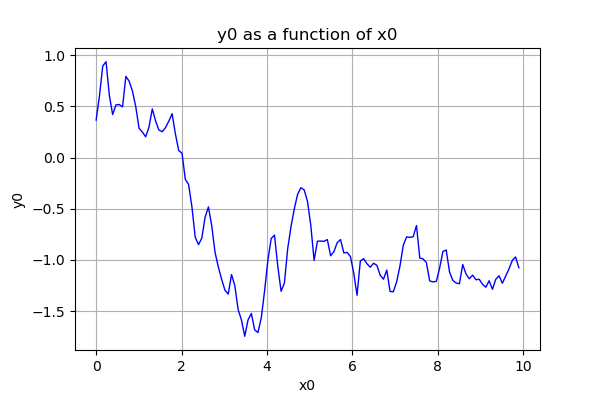

In [30]:
# Draw its first marginal
marginal0 = continuousRealization.getMarginal(0)
marginal0.draw(minMesh, maxMesh)

In [31]:
# Get several realizations of the process
number = 10
fieldSample = process.getSample(number)
fieldSample

class=ProcessSampleImplementation mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=[class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=3 description=[y0,y1,y2] data=[[-0.703482,-2.47529,-0.329954],[-0.722674,-2.64718,-0.296545],[-0.875495,-2.90137,-1.27175],[-0.856608,-2.54954,-2.42589],[-0.803305,-1.97278,-2.80956],[-1.09994,-2.52798,-2.51576],[-1.02202,-2.16563,-2.88876],[-0.753494,-1.74451,-2.28529],[-0.804198,-1.97675,-1.95031],[-0.546851,-1.35769,-1.79171],[-0.489595,-1.41342,-1.18236],[-0.61931,-1.18423,-2.41437],[-0.572106,-0.894143,-2.86056],[-0.891192,-1.95901,-2.96487],[-0.85914,-2.38749,-1.79992],[-0.650038,-2.16539,-0.929266],[-0.753367,-2.0876,-2.06546],[-0.282777,-1.51175,-0.738708],[-0.676289,-2.33969,-1.80442],[-0.536224,-2.18383,-1.12532],[-0.511432,-2.22345,-0.985746],[-0.654185,-2.42645,-1.1747],[-0.574603,-2.32326,-1.21153],[-0.359092,-1.71122,-1.09189],[-0.428518,-2.02051,-0.838421],[-0.421137,-1.75848,-1.96916],[-0.404916,-1.75905,-1.49413],[-0.46877,-1.89375,-2.07412],[-0.260103,-1.78436,-1.65855],[-0.396078,-1.78285,-1.97563],[-0.417835,-1.80332,-1.57016],[-0.557497,-2.25688,-1.2652],[-0.256703,-1.82914,-0.707997],[-0.407246,-1.96255,-0.450344],[-0.290452,-1.53695,-0.188149],[-0.151834,-1.05288,-0.544179],[-0.261811,-0.774391,-1.27938],[-0.0786163,0.037458,-1.71554],[0.00120852,0.128618,-0.985953],[-0.169309,0.00821638,-0.592958],[0.0626286,0.385689,-0.0835556],[-0.33967,-0.666269,0.26327],[-0.37602,-0.284156,-0.725205],[-0.809798,-1.1291,-1.27925],[-1.01464,-1.65982,-1.15332],[-0.820477,-1.19933,-0.932941],[-0.693519,-0.706716,-1.13663],[-0.533667,-0.756102,-0.535876],[-0.821764,-0.945171,-1.41705],[-0.749759,-0.745858,-1.60155],[-1.02171,-1.33737,-2.16751],[-0.88668,-0.984363,-2.76507],[-0.781577,-0.64325,-2.90441],[-0.530627,-0.159371,-3.22794],[-0.796912,-0.86048,-2.85494],[-0.674991,-0.906609,-2.63918],[-0.579595,-1.00354,-1.84074],[-0.504017,-1.26173,-1.29553],[-0.321708,-0.264308,-1.43697],[-0.525783,-0.570017,-1.54938],[-0.10315,0.267044,-0.616943],[-0.48334,-0.171592,-1.52319],[-0.524957,-0.446817,-1.13714],[-0.390866,0.261341,-1.98815],[-0.131422,0.598114,-0.941229],[0.34426,1.03876,0.234392],[0.465492,0.925428,0.873869],[0.827472,1.26395,1.79598],[0.695449,1.14434,1.56294],[0.996092,1.38097,2.47246],[1.00403,1.43716,2.51323],[0.962838,1.8414,1.13652],[1.06774,1.78158,1.59284],[0.869415,1.42939,1.54382],[0.688921,1.47003,0.591615],[0.597907,1.08696,0.543576],[0.868871,1.15606,1.8

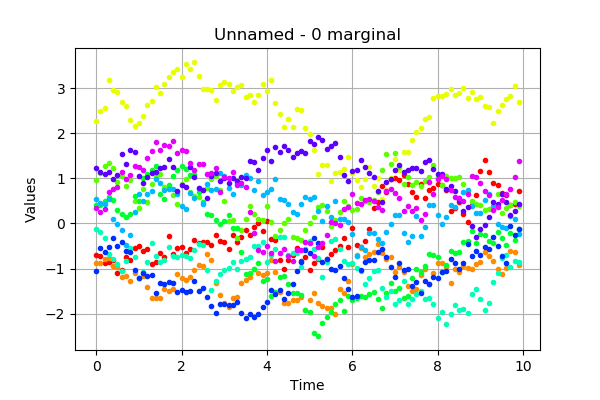

In [32]:
# Draw a sample of the process 
fieldSample.drawMarginal(0, False)

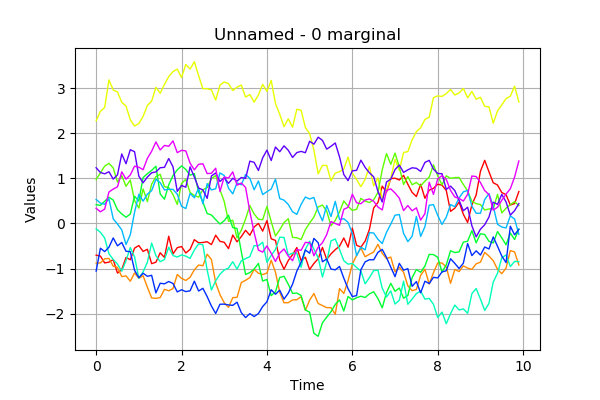

In [33]:
# Same graph, but draw interpolated values
fieldSample.drawMarginal(0)

In [34]:
# Get the marginal of the process at index 1
# Care! Numerotation begins at 0
# Not yet implemented for some processes
process.getMarginal(1)

class=Process implementation=class=GaussianProcess mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x0,y1] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] covarianceModel=class=Ex

In [35]:
# Get the marginal of the process at index in indices
# Not yet implemented for some processes
process.getMarginal([0, 1])

class=Process implementation=class=GaussianProcess mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x0,x1,y0,y1] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputV

In [36]:
# Check wether the process is normal
process.isNormal()

True

In [45]:
# Check wether the process is stationary
process.isStationary()

True